# Task 2: Approximation of function

Our function, that we want to approximate:
$$ 
f(x) = \sin{\frac{x}{5}} + \exp{\frac{x}{10}} + 5\exp{\frac{-x}{2}}.
$$

At first we need to declare function f(x), which we want to approximate

In [1]:
import math
from scipy.linalg import solve

In [2]:
def f(x):
    return math.sin(x/5) * math.exp(x/10) +  5 * math.exp((-x)/2)

And we need to declare function

In [3]:
def f_vector(w, x):
    res = 0;
    for i in range(w.shape[0]):
        res += w[i] * x**i
    return res

Let's draw graph of our function:

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [5]:
x_data = np.arange(1, 15.1, 0.1)
y_func_data = np.array([f(x) for x in x_data])

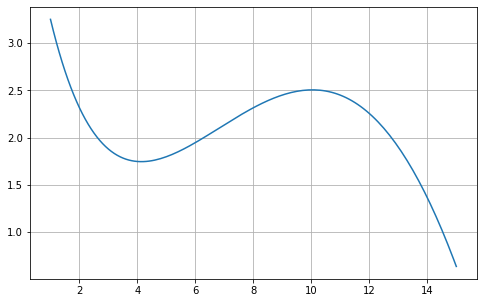

In [6]:
plt.figure(figsize = (8,5))
plt.grid()
plt.plot(x_data, y_func_data)

## 1) Approximation with 2 points

In [7]:
xs = [1, 15]
A = np.zeros((len(xs), len(xs)))
b = np.zeros(len(xs))

for i in range(len(xs)):
    for j in range(len(xs)):
        A[j][i] = xs[j]**i
    b[i] = f(xs[i])

In [8]:
print('A:', A)
print('b:', b)

A: [[ 1.  1.]
 [ 1. 15.]]
b: [3.25221687 0.63522142]


In [9]:
w = solve(A, b)
w

array([ 3.43914511, -0.18692825])

In [10]:
y_data = np.array([f_vector(w, x) for x in x_data])


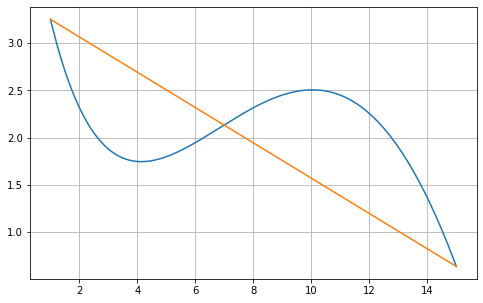

In [11]:
plt.figure(figsize = (8,5))
plt.grid()
plt.plot(x_data, y_func_data)
plt.plot(x_data, y_data)

# 2) Approximation with 3 points

In [31]:
xs = [1, 8, 15]
A = np.zeros((len(xs), len(xs)))
b = np.zeros(len(xs))

for i in range(len(xs)):
    for j in range(len(xs)):
        A[j][i] = xs[j]**i
    b[i] = f(xs[i])

In [32]:
print('A:', A)
print('b:', b)

A: [[  1.   1.   1.]
 [  1.   8.  64.]
 [  1.  15. 225.]]
b: [3.25221687 2.31617016 0.63522142]


In [33]:
w = solve(A, b)
w

array([ 3.32512949, -0.06531159, -0.00760104])

In [34]:
y_data = np.array([f_vector(w, x) for x in x_data])


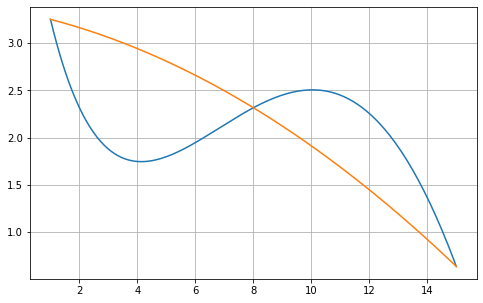

In [35]:
plt.figure(figsize = (8,5))
plt.grid()
plt.plot(x_data, y_func_data)
plt.plot(x_data, y_data)

# 3) Approximation with 4 points

In [17]:
xs = [1, 4, 10, 15]

A = np.zeros((len(xs), len(xs)))
b = np.zeros(len(xs))

for i in range(len(xs)):
    for j in range(len(xs)):
        A[j][i] = xs[j]**i
    b[i] = f(xs[i])

In [18]:
print('A:', A)
print('b:', b)

A: [[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]]
b: [3.25221687 1.74684595 2.50541641 0.63522142]


In [19]:
w = solve(A, b)
w

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [20]:
y_data = np.array([f_vector(w, x) for x in x_data])


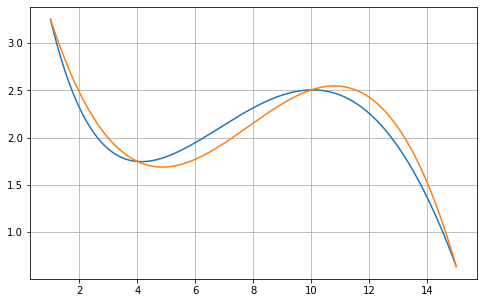

In [21]:
plt.figure(figsize = (8,5))
plt.grid()
plt.plot(x_data, y_func_data)
plt.plot(x_data, y_data)

Knowing just 4 points, we managed to approximate the function pretty closely. Now let's write our result into the file `submission-2.txt`:

In [22]:
ofile = open('submission-2.txt', 'w')
for i in w:
    ofile.write(str(i)+' ')
ofile.close()